In [15]:
import string
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(['2014', 'us','new','may']) # remove it if you need punctuation 

    return ' '.join(word for word in nopunc.split() if word.lower() not in stop_words)

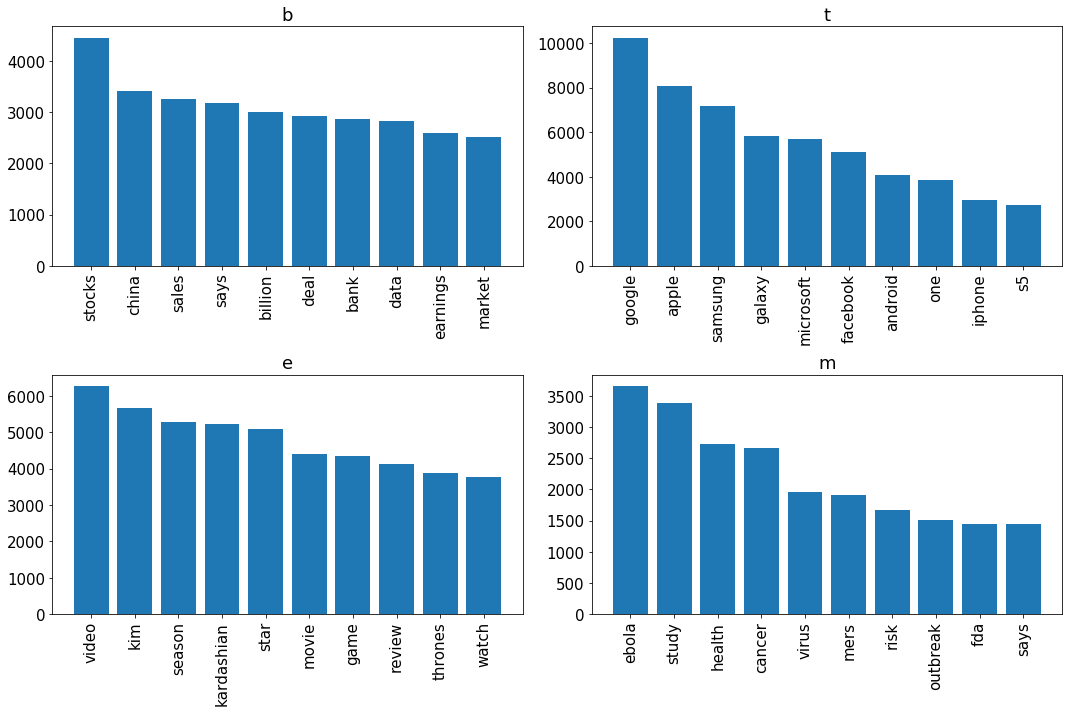

In [17]:
from collections import Counter
plt.figure(figsize=(15,10))
def histogram_label(df):
    i=1
    df_title_category = df[['TITLE','CATEGORY']]
    df_title_category['TITLE']=df_title_category['TITLE'].apply(text_process).str.lower()
    
    categories =df['CATEGORY'].drop_duplicates().tolist()
    for category in categories:
            df_title=df_title_category.query('CATEGORY ==  @category')
            result =" ".join(df_title['TITLE'].values.tolist()).split(" ")
            Counter_=Counter(result).most_common(10)
       
   
            labels = [item[0] for item in Counter_]
            number = [item[1] for item in Counter_]
            nbars = len(Counter_)
            plt.subplot(2,2,i)
            plt.xticks(rotation=90,fontsize=15)
            plt.yticks(fontsize=15)
            plt.title(category, fontsize=18)
            plt.bar(np.arange(nbars), number, tick_label=labels)
            i=i+1
    
    
news = pd.read_csv('uci-news-aggregator.csv')    
histogram_label(news)   
plt.tight_layout()
plt.show()

In [18]:
X = news.TITLE
y = news.CATEGORY

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initializing Pipline
pipelineMLP = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier()),  # train on TF-IDF vectors w/ Logistic Regression
])

# Training the model
pipelineMLP.fit(X_train, y_train)

# Predictions
predictionsMLP = pipelineMLP.predict(X_test)

# Model Evaluation
print(classification_report(predictionsMLP, y_test))